In [1]:
# !pip install sacremoses

In [2]:
from datasets import load_dataset
# possible language pairs: https://opus.nlpl.eu/KDE4.php
data = load_dataset("kde4", lang1="en", lang2="fr")
data

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [3]:
# Data is too large!
small = data['train'].shuffle(seed=42).select(range(1_000))

In [4]:
small

Dataset({
    features: ['id', 'translation'],
    num_rows: 1000
})

In [5]:
small[0]

{'id': '98963',
 'translation': {'en': 'Netscape Communicator reg; plugins (for viewing Flash reg;, Real reg; Audio, Real reg; Video, etc.)',
  'fr': 'Netscape Communicator reg; modules externes (pour afficher Flash reg;, Real reg; Audio, Real reg; Video, etc.)'}}

In [6]:
from datasets import Dataset, DatasetDict

def splitTrainTestValidation(dataset: Dataset, valid_size=.1, test_size=.1):
    len_valid = int(len(dataset) * valid_size)
    len_test = int(len(dataset) * test_size)
    
    splited: DatasetDict = dataset.train_test_split(len_valid + len_test, shuffle=False, seed=42)
    splited['validation'] = splited['test']
    del splited['test']
    
    splited_2 = splited['validation'].train_test_split(len_test, shuffle=True, seed=42)
    splited['validation'] = splited_2['train']
    splited['test'] = splited_2['test']
    
    return splited

In [7]:
split = splitTrainTestValidation(small)
split

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['id', 'translation'],
        num_rows: 100
    })
    test: Dataset({
        features: ['id', 'translation'],
        num_rows: 100
    })
})

In [8]:
split['train'][0]

{'id': '98963',
 'translation': {'en': 'Netscape Communicator reg; plugins (for viewing Flash reg;, Real reg; Audio, Real reg; Video, etc.)',
  'fr': 'Netscape Communicator reg; modules externes (pour afficher Flash reg;, Real reg; Audio, Real reg; Video, etc.)'}}

In [9]:
en = split['train'][0]['translation']['en']
fr = split['train'][0]['translation']['fr']
en, fr

('Netscape Communicator reg; plugins (for viewing Flash reg;, Real reg; Audio, Real reg; Video, etc.)',
 'Netscape Communicator reg; modules externes (pour afficher Flash reg;, Real reg; Audio, Real reg; Video, etc.)')

In [10]:
from transformers import AutoTokenizer

checkpoint = "Helsinki-NLP/opus-mt-en-fr"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [11]:
inputs = tokenizer(en)

# Old way (deprecated):
with tokenizer.as_target_tokenizer():
    targets = tokenizer(fr)

# New way:
targets_new = tokenizer(text_target=fr)

# Note: inputs and targets ids tend to be very similar, specially when bot languages are similar
inputs, targets, targets_new

/home/bruno/anaconda3/envs/gpt/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:3635: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


({'input_ids': [8025, 22880, 40578, 222, 3847, 317, 309, 50, 20142, 9, 24, 2636, 24736, 13772, 317, 309, 50, 2, 7770, 317, 309, 50, 12374, 2, 7770, 317, 309, 50, 7756, 2, 1025, 3, 28, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [8025, 22880, 14884, 792, 3847, 317, 309, 50, 8647, 9271, 24, 5601, 14268, 13772, 317, 309, 50, 2, 7770, 317, 309, 50, 12374, 2, 7770, 317, 309, 50, 7756, 2, 1025, 3, 28, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'input_ids': [8025, 22880, 14884, 792, 3847, 317, 309, 50, 8647, 9271, 24, 5601, 14268, 13772, 317, 309, 50, 2, 7770, 317, 309, 50, 12374, 2, 7770, 317, 309, 50, 7756, 2, 1025, 3, 28, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

In [12]:
print(tokenizer.convert_ids_to_tokens(targets['input_ids']))

['▁Net', 'scape', '▁Commun', 'ic', 'ator', '▁re', 'g', ';', '▁modules', '▁externes', '▁(', 'pour', '▁afficher', '▁Flash', '▁re', 'g', ';', ',', '▁Real', '▁re', 'g', ';', '▁Audio', ',', '▁Real', '▁re', 'g', ';', '▁Video', ',', '▁etc', '.', ')', '</s>']


In [13]:
# Let's see the wrong way:
# Using english tokenizer to converting french sentence
targets_wrong = tokenizer(fr)

# let's print the tokens to see what us happaning
tokenizer.convert_ids_to_tokens(targets_wrong['input_ids'])

['▁Net',
 'scape',
 '▁Communi',
 'c',
 'ator',
 '▁re',
 'g',
 ';',
 '▁modules',
 '▁ex',
 'tern',
 'es',
 '▁(',
 'p',
 'our',
 '▁a',
 'ffi',
 'cher',
 '▁Flash',
 '▁re',
 'g',
 ';',
 ',',
 '▁Real',
 '▁re',
 'g',
 ';',
 '▁Audio',
 ',',
 '▁Real',
 '▁re',
 'g',
 ';',
 '▁Video',
 ',',
 '▁etc',
 '.',
 ')',
 '</s>']

90% of lens: 132.10000000000002
Percent of data covered until 128: 89.875 %


(array([511., 127.,  47.,  23.,  11.,  14.,  19.,   6.,   5.,   3.,   2.,
          7.,   4.,   4.,   2.,   1.,   3.,   1.,   2.,   1.,   1.,   2.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2. ,   27.7,   53.4,   79.1,  104.8,  130.5,  156.2,  181.9,
         207.6,  233.3,  259. ,  284.7,  310.4,  336.1,  361.8,  387.5,
         413.2,  438.9,  464.6,  490.3,  516. ,  541.7,  567.4,  593.1,
         618.8,  644.5,  670.2,  695.9,  721.6,  747.3,  773. ,  798.7,
         824.4,  850.1,  875.8,  901.5,  927.2,  952.9,  978.6, 1004.3,
        1030. , 1055.7, 1081.4, 1107.1, 1132.8, 1158.5, 1184.2, 1209.9,
        1235.6, 1261.3, 1287. ]),
 <BarContainer object of 50 artists>)

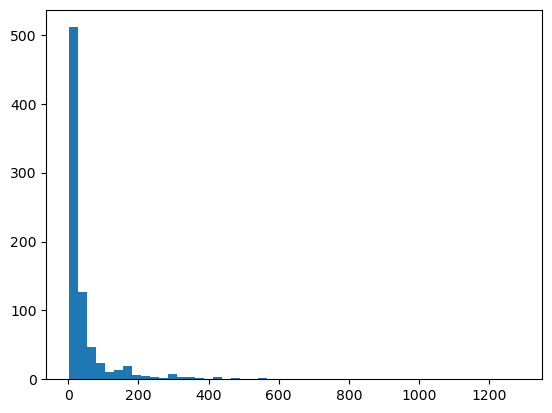

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import percentileofscore
input_lens = [len(x['en']) for x in split['train']['translation']]

print(f"90% of lens: {np.percentile(input_lens, q=90)}")
print(f"Percent of data covered until 128: {percentileofscore(input_lens, 128)} %")
plt.hist(input_lens, bins=50)


90% of lens: 164.0
Percent of data covered until 128: 88.25 %


(array([444., 179.,  60.,  26.,  15.,  17.,  14.,   4.,   3.,   5.,   3.,
          7.,   3.,   3.,   2.,   6.,   3.,   0.,   1.,   3.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 3.47200e+01, 6.84400e+01, 1.02160e+02, 1.35880e+02,
        1.69600e+02, 2.03320e+02, 2.37040e+02, 2.70760e+02, 3.04480e+02,
        3.38200e+02, 3.71920e+02, 4.05640e+02, 4.39360e+02, 4.73080e+02,
        5.06800e+02, 5.40520e+02, 5.74240e+02, 6.07960e+02, 6.41680e+02,
        6.75400e+02, 7.09120e+02, 7.42840e+02, 7.76560e+02, 8.10280e+02,
        8.44000e+02, 8.77720e+02, 9.11440e+02, 9.45160e+02, 9.78880e+02,
        1.01260e+03, 1.04632e+03, 1.08004e+03, 1.11376e+03, 1.14748e+03,
        1.18120e+03, 1.21492e+03, 1.24864e+03, 1.28236e+03, 1.31608e+03,
        1.34980e+03, 1.38352e+03, 1.41724e+03, 1.45096e+03, 1.48468e+03,
 

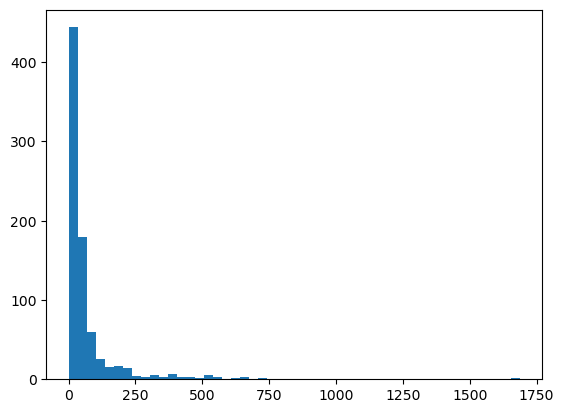

In [15]:
targets_lens = [len(x['fr']) for x in split['train']['translation']]

print(f"90% of lens: {np.percentile(targets_lens, q=90)}")
print(f"Percent of data covered until 128: {percentileofscore(targets_lens, 128)} %")

plt.hist(targets_lens, bins=50)

In [16]:
# Based on the histograms
max_input_len = 128
max_target_len = 128

In [17]:
def tokenize_fn(batch):
    inputs = [x["en"] for x in batch["translation"]]
    targets = [x["fr"] for x in batch["translation"]]

    tokenized_inputs = tokenizer(inputs, truncation=True, max_length=max_input_len)
    tokenized_targets = tokenizer(
        text_target=targets,
        padding="max_length",
        truncation=True,
        max_length=max_target_len,
    )

    tokenized_inputs["labels"] = tokenized_targets["input_ids"]

    return tokenized_inputs


In [18]:
tokenized_dataset = split.map(tokenize_fn, batched=True, remove_columns=split['train'].column_names)
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 100
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 100
    })
})

In [19]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [20]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [21]:
print([tokenized_dataset['train'][i] for i in range(1, 3)])


[{'input_ids': [23272, 12, 7689, 0], 'attention_mask': [1, 1, 1, 1], 'labels': [16572, 51, 39, 698, 339, 0, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513]}, {'input_ids': [5892, 2699, 402, 2635

In [22]:
batch = data_collator([tokenized_dataset['train'][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [23]:
batch['labels']

tensor([[16572,    51,    39,   698,   339,     0, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 5

In [24]:
batch['decoder_input_ids']

tensor([[59513, 16572,    51,    39,   698,   339,     0, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513, 59513,
         59513, 59513, 59513, 59513, 59513, 59513, 5

In [25]:
print(tokenizer.convert_ids_to_tokens(batch['decoder_input_ids'][0]))

['<pad>', '▁Mettr', 'e', '▁au', '▁premier', '▁plan', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<p

In [26]:
# old (deprecated) way
# from datasets import load_metric

# bleu_metric = load_metric("sacrebleu")
# bert_metric = load_metric("bertscore")

In [27]:
# new way
import evaluate

bleu_metric = evaluate.load("sacrebleu")
bert_metric = evaluate.load("bertscore")

In [28]:
bleu_metric.compute(
    predictions=["I love cats"],
    references=[["I love cats"]],
)

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [29]:
s = "Marian is an efficient NMT framework written in pure C++"
bleu_metric.compute(predictions=[s] , references=[[s]])

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [30]:
bert_metric.compute(
    predictions=["I love cats"],
    references=[["I love cats"]],
    lang='en',
)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'precision': [1.0],
 'recall': [1.0],
 'f1': [1.0],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.31.0)'}

In [31]:
bleu_metric.compute(
    predictions=["I love cats"],
    references=[["I like cats"]],
)

{'score': 0.0,
 'counts': [2, 0, 0, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [66.66666666666667, 25.0, 25.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [32]:
bert_metric.compute(
    predictions=["I love cats"],
    references=[["I like cats"]],
    lang='en',
)

{'precision': [0.9803368449211121],
 'recall': [0.9803368449211121],
 'f1': [0.9803368449211121],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.31.0)'}

In [33]:
bert_metric.compute(predictions=[s], references=[[s]], lang="en")


{'precision': [1.0],
 'recall': [1.0],
 'f1': [1.0],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.31.0)'}

In [34]:

import numpy as np

def compute_metrics(tokenIds_and_labels):
    # Diff from other stuff seen before!
    # This time the library returns the prediction itself, not logits.
    # Why?
    # This is beacuse Machine Translation models use a special algorithm called "beam search" to find the predictions
    # It's not so trivial as using the argmax as we did before.
    # So the library returns the predictions ready for us, so that we don't need to call the beam search algorithm by ourselves.
    preds, labels = tokenIds_and_labels
    
    # THe metrics now uses strings, not token ids. So we will need to decode the ids into words
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    
    # for any -100 label found, replace with pad_token_id
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # Get rid of extraneous whitespaces
    # and also puts targets into lists
    # as required by the metrics functions
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [[label.strip()] for label in decoded_labels]
    
    bleu = bleu_metric.compute(predictions=decoded_preds, references=decoded_labels)
    bert = bert_metric.compute(predictions=decoded_preds, references=decoded_labels, lang="fr")
    
    # Bert score is returned per sample, so we take mean
    return {"bleu": bleu["score"], "bert_score": np.mean(bert["f1"])}

In [35]:
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

training_args = Seq2SeqTrainingArguments(
    "my-trainer",
    evaluation_strategy = "no",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=1,
    seed=42,
    # During evaluation, generate predictions wthout knowing the true targets fed into decoder
    predict_with_generate=True,
    fp16=False, # The lectures recommend turn this true, but we loose precision
    learning_rate=2e-5,
    weight_decay=0.01,
    num_train_epochs=3,
    save_total_limit=3,
)

In [36]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [37]:
trainer.evaluate(max_length=max_target_len)

  0%|          | 0/100 [00:00<?, ?it/s]

{'eval_loss': 7.468404769897461,
 'eval_bleu': 32.85382973648274,
 'eval_bert_score': 0.8555682480335236,
 'eval_runtime': 10.5638,
 'eval_samples_per_second': 9.466,
 'eval_steps_per_second': 9.466}

In [38]:
trainer.train()

/home/bruno/anaconda3/envs/gpt/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/150 [00:00<?, ?it/s]

{'train_runtime': 34.3937, 'train_samples_per_second': 69.78, 'train_steps_per_second': 4.361, 'train_loss': 0.3342540740966797, 'epoch': 3.0}


TrainOutput(global_step=150, training_loss=0.3342540740966797, metrics={'train_runtime': 34.3937, 'train_samples_per_second': 69.78, 'train_steps_per_second': 4.361, 'train_loss': 0.3342540740966797, 'epoch': 3.0})

In [39]:
trainer.evaluate(max_length=max_target_len)

  0%|          | 0/100 [00:00<?, ?it/s]

{'eval_loss': 0.14306989312171936,
 'eval_bleu': 38.39688826526925,
 'eval_bert_score': 0.8740445053577424,
 'eval_runtime': 10.1441,
 'eval_samples_per_second': 9.858,
 'eval_steps_per_second': 9.858,
 'epoch': 3.0}

In [40]:
trainer.save_model("my_saved_model")

In [41]:
from transformers import pipeline

translator = pipeline("translation", model="my_saved_model", device=0)

In [42]:
translator("I hope this course has helped you on your data science journey!")

[{'translation_text': "J'espère que ce cours vous aidera dans votre parcours data science!"}]